In [2]:
import pandas as pd       # for handling data
import numpy as np        # for mathematical operations
from sklearn.model_selection import train_test_split  # to split data for training/testing
from sklearn.linear_model import LinearRegression    # our first model
from sklearn.metrics import mean_squared_error, r2_score  # evaluate model performance
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for better plots

In [3]:
data = pd.read_csv("student_data.csv")  # load the file
print(data.head())  # show first 5 rows
print(data.info())  # info about columns and data types
print(data.describe())  # statistical summary

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [4]:
print(data.isnull().sum())
data = data.dropna()  # remove rows with missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
data = data.drop_duplicates() #to remove duplicate rows from the dataset

In [6]:
# Models can’t read text. Encoding converts text into numbers.
# Convert yes/no or male/female to 0/1
data['sex'] = data['sex'].map({'M':0, 'F':1})
data['address'] = data['address'].map({'U':1, 'R':0})

# For multiple categories, use one-hot encoding
data = pd.get_dummies(data, columns=['Mjob', 'Fjob', 'guardian'], drop_first=True)
print(data.head())  # check the changes

  school  sex  age  address famsize Pstatus  Medu  Fedu  reason  traveltime  \
0     GP    1   18        1     GT3       A     4     4  course           2   
1     GP    1   17        1     GT3       T     1     1  course           1   
2     GP    1   15        1     LE3       T     1     1   other           1   
3     GP    1   15        1     GT3       T     4     2    home           1   
4     GP    1   16        1     GT3       T     3     3    home           1   

   ...  Mjob_health  Mjob_other Mjob_services Mjob_teacher Fjob_health  \
0  ...        False       False         False        False       False   
1  ...        False       False         False        False       False   
2  ...        False       False         False        False       False   
3  ...         True       False         False        False       False   
4  ...        False        True         False        False       False   

  Fjob_other Fjob_services Fjob_teacher guardian_mother guardian_other  
0      

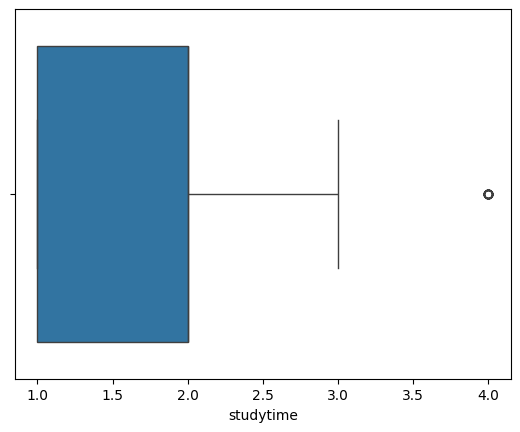

In [7]:
sns.boxplot(x=data['studytime'])
plt.show()
data = data[data['studytime'] < 20]  # remove unrealistic studytime

In [8]:
X = data[['studytime', 'failures', 'absences', 'Dalc', 'Walc', 'G1', 'G2']]
y = data['G3']

In [9]:
# To check how well the model works on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()    #This is how the model learns patterns in the data.
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# Make predictions
y_pred = model.predict(X_test)   #We can now compare these predictions to actual marks.

In [12]:
# Evaluate the model

# MSE (Mean Squared Error): Average squared difference between predicted and actual marks. Lower is better.
# R² Score: Measures how much variance in marks is explained by the model (1 = perfect, 0 = no correlation).
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 4.439357671807347
R^2 Score: 0.7834992714832179


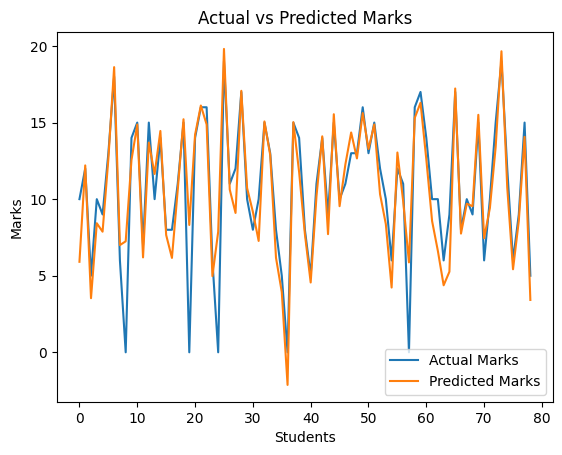

In [ ]:
plt.plot(y_test.values, label="Actual Marks")
plt.plot(y_pred, label="Predicted Marks")

plt.xlabel("Students")
plt.ylabel("Marks")
plt.title("Actual vs Predicted Marks")

plt.legend()
plt.show()
